In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output
import matplotlib.style as style
style.use('ggplot')

%matplotlib inline

In [67]:
# Load joined dataframe
df = pd.read_csv('csv/metadata_text_merged_cleaned.csv')
# Remove rows with empty text column for now
df = df.dropna(subset=['text'])

# Search and Visualization of Term Occurrences:
This tool enables you to visualize changes in the frequency of term occurrences in this corpus over space and time.

Usage: Modify what's within the brackets next to the variable named "terms" below. Click on the cell below and press Shift + Return in order to run the cell (alternatively, click on the cell below and select Select Cell -> Run Cells in the menu above).

('Filtering for term:', ['pirate', 'pirates'], '(59 total letters)')
First 5 rows of filtered dataframe:


,UID,Vol,LetterNo,Sender,Place Sent From,Ship Name,Place Going To,Date,Boat/Fort,RAC/Other Nation,text,Year,Month,text_cleaned,text_cleaned_dealiased,filtered
24,633,1,633,David Harper,Aboard the Hopewell,Hopewell,Cape Coast Castle,15,Transatlantic Voyage,RAC,"I came this evening aboard of Captain Lumley, ...",1683.0,5.0,came evening aboard captain lumley whoe found ...,came evening aboard captain lumley whoe found ...,True
100,454,1,454,Ralph Hassell,Accra,NaN,Cape Coast Castle,14,Fort,RAC,Yours of the 12th instant I received last nigh...,1683.0,5.0,12th instant received last night made answer t...,12th instant received last night made answer t...,True
103,457,1,457,Ralph Hassell,Accra,NaN,Cape Coast Castle,03,Fort,RAC,Yours of the 23rd past per Mr Towgood and of t...,1683.0,7.0,23rd past per mr towgood 28th ditto per john l...,23rd past per mr towgood 28th ditto per john l...,True
126,1348,2,708,Mark Bedford Whiting,Accra,NaN,Cape Coast Castle,24,Fort,RAC,I haveing this opertunity of sending could not...,1686.0,1.0,haveing opertunity sending could lett slip inf...,haveing opertunity sending could let slip info...,True
231,1538,2,898,John Carter,Accra,Mary,Cape Coast Castle,24,Transatlantic Voyage,RAC,This is to acquaint you of our arrivall at Acc...,1686.0,1.0,acquaint arrivall accra chast two pyrats axim ...,acquaint arrivall accra chast two pirates axim...,True


UIDs of letters containing the term:
[ 633  454  457 1348 1538  558  560  561  562  351  370  557  624 1024
 1028 1471 1584 1562 1470 1472 1617 1620 1635 1636  784  807  809  892
  936  938  941  494  495  632  637  636  639 3055    5    6    7    8
  646  647  648  649  655  656  663  664  723  751  754  755  756  757
 1817 1599 1588]


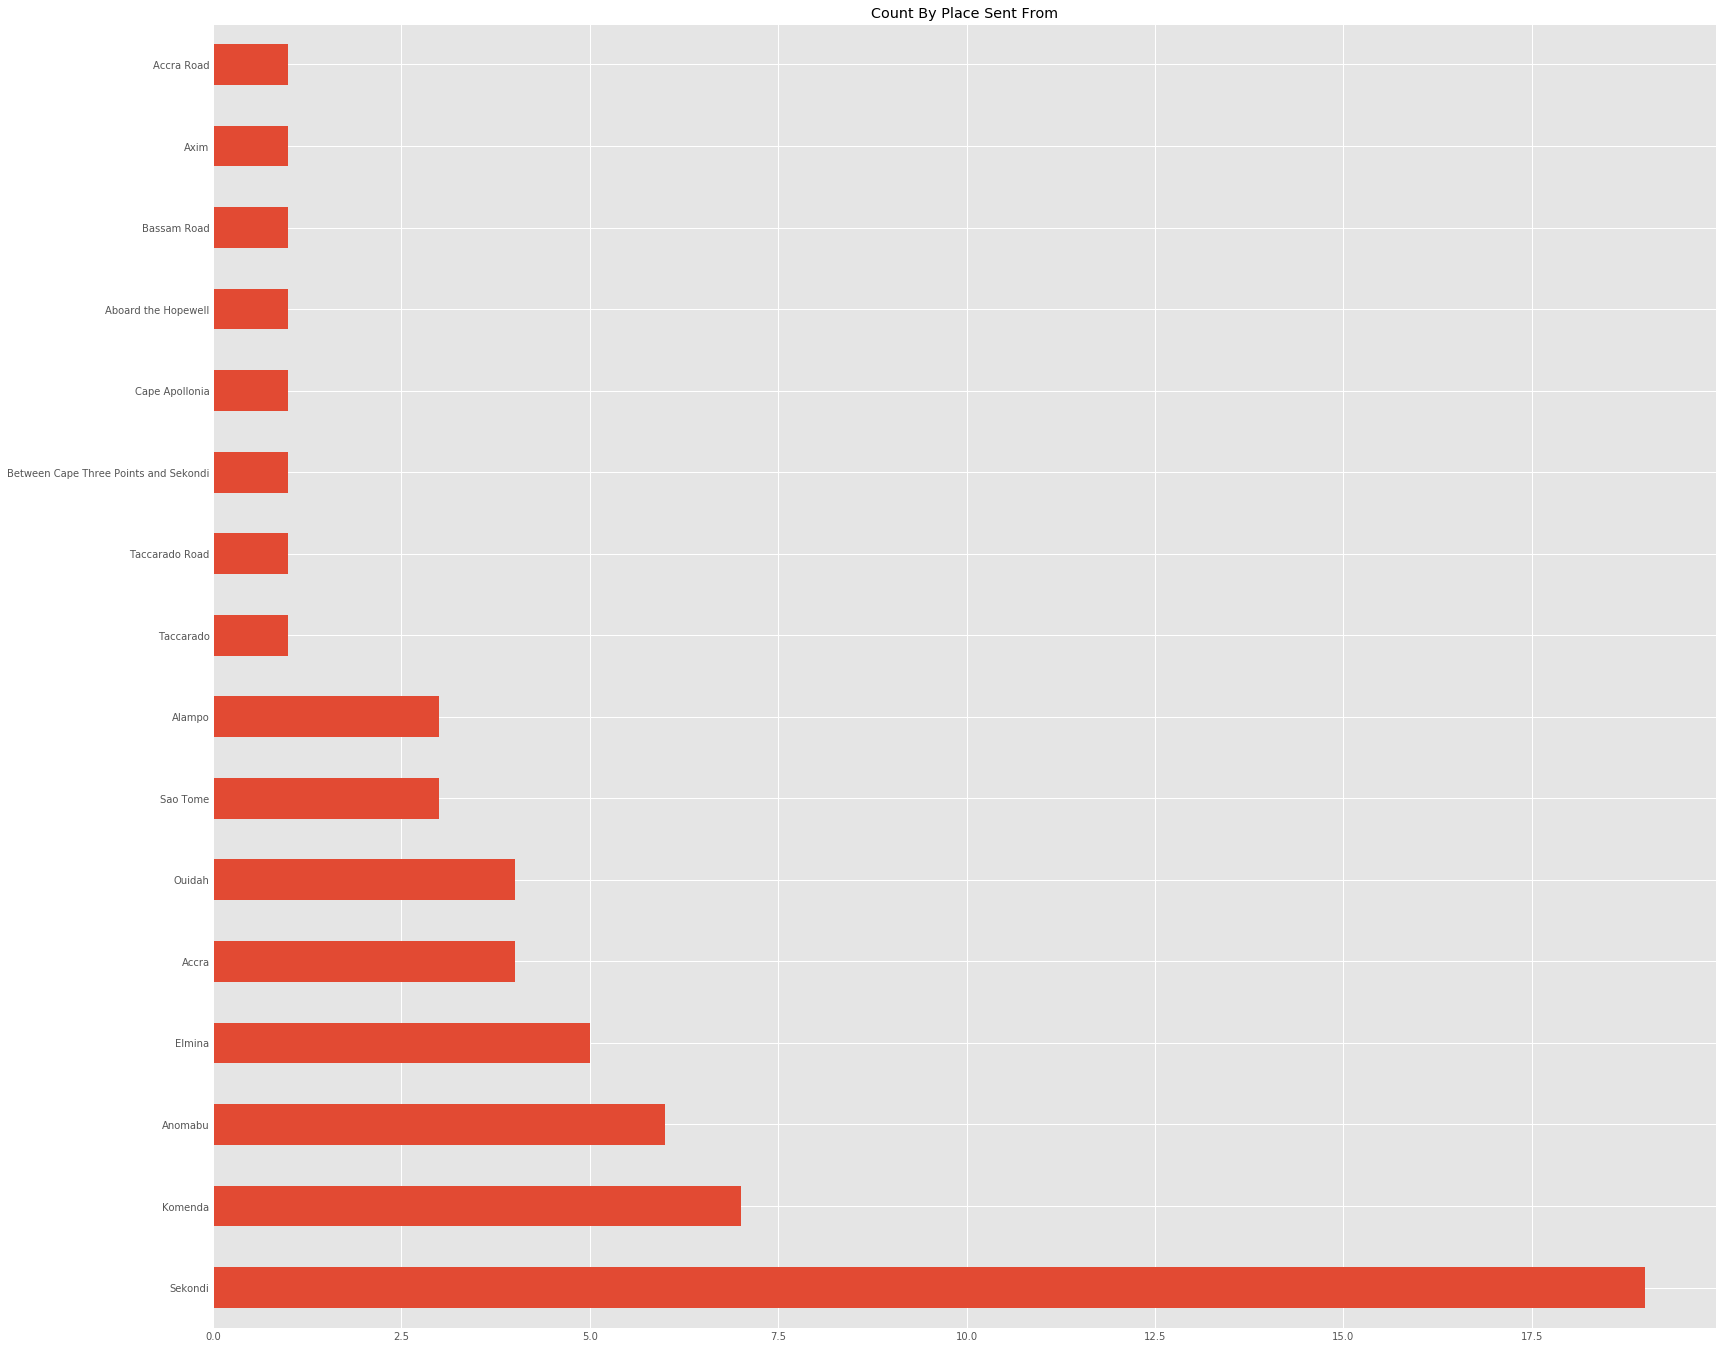

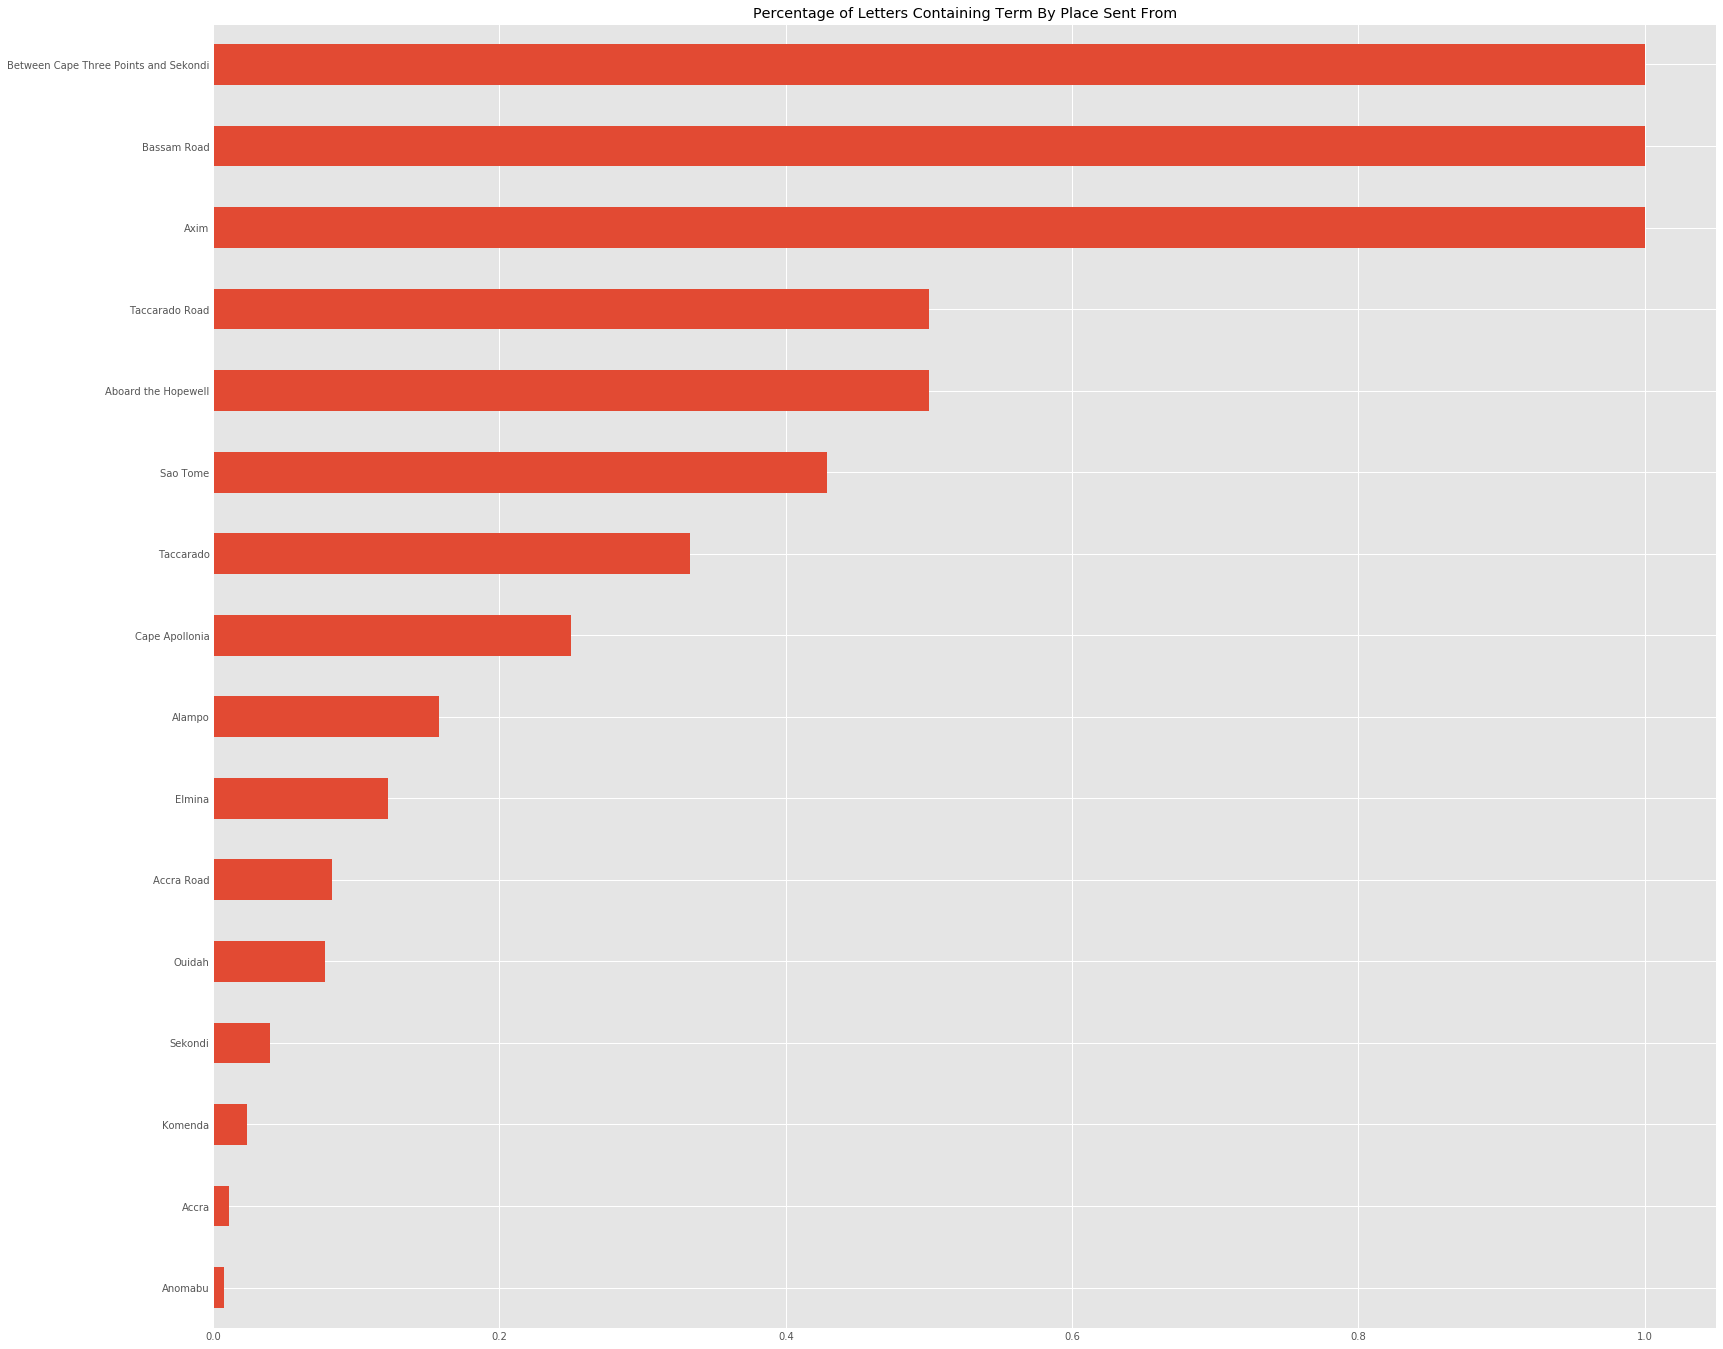

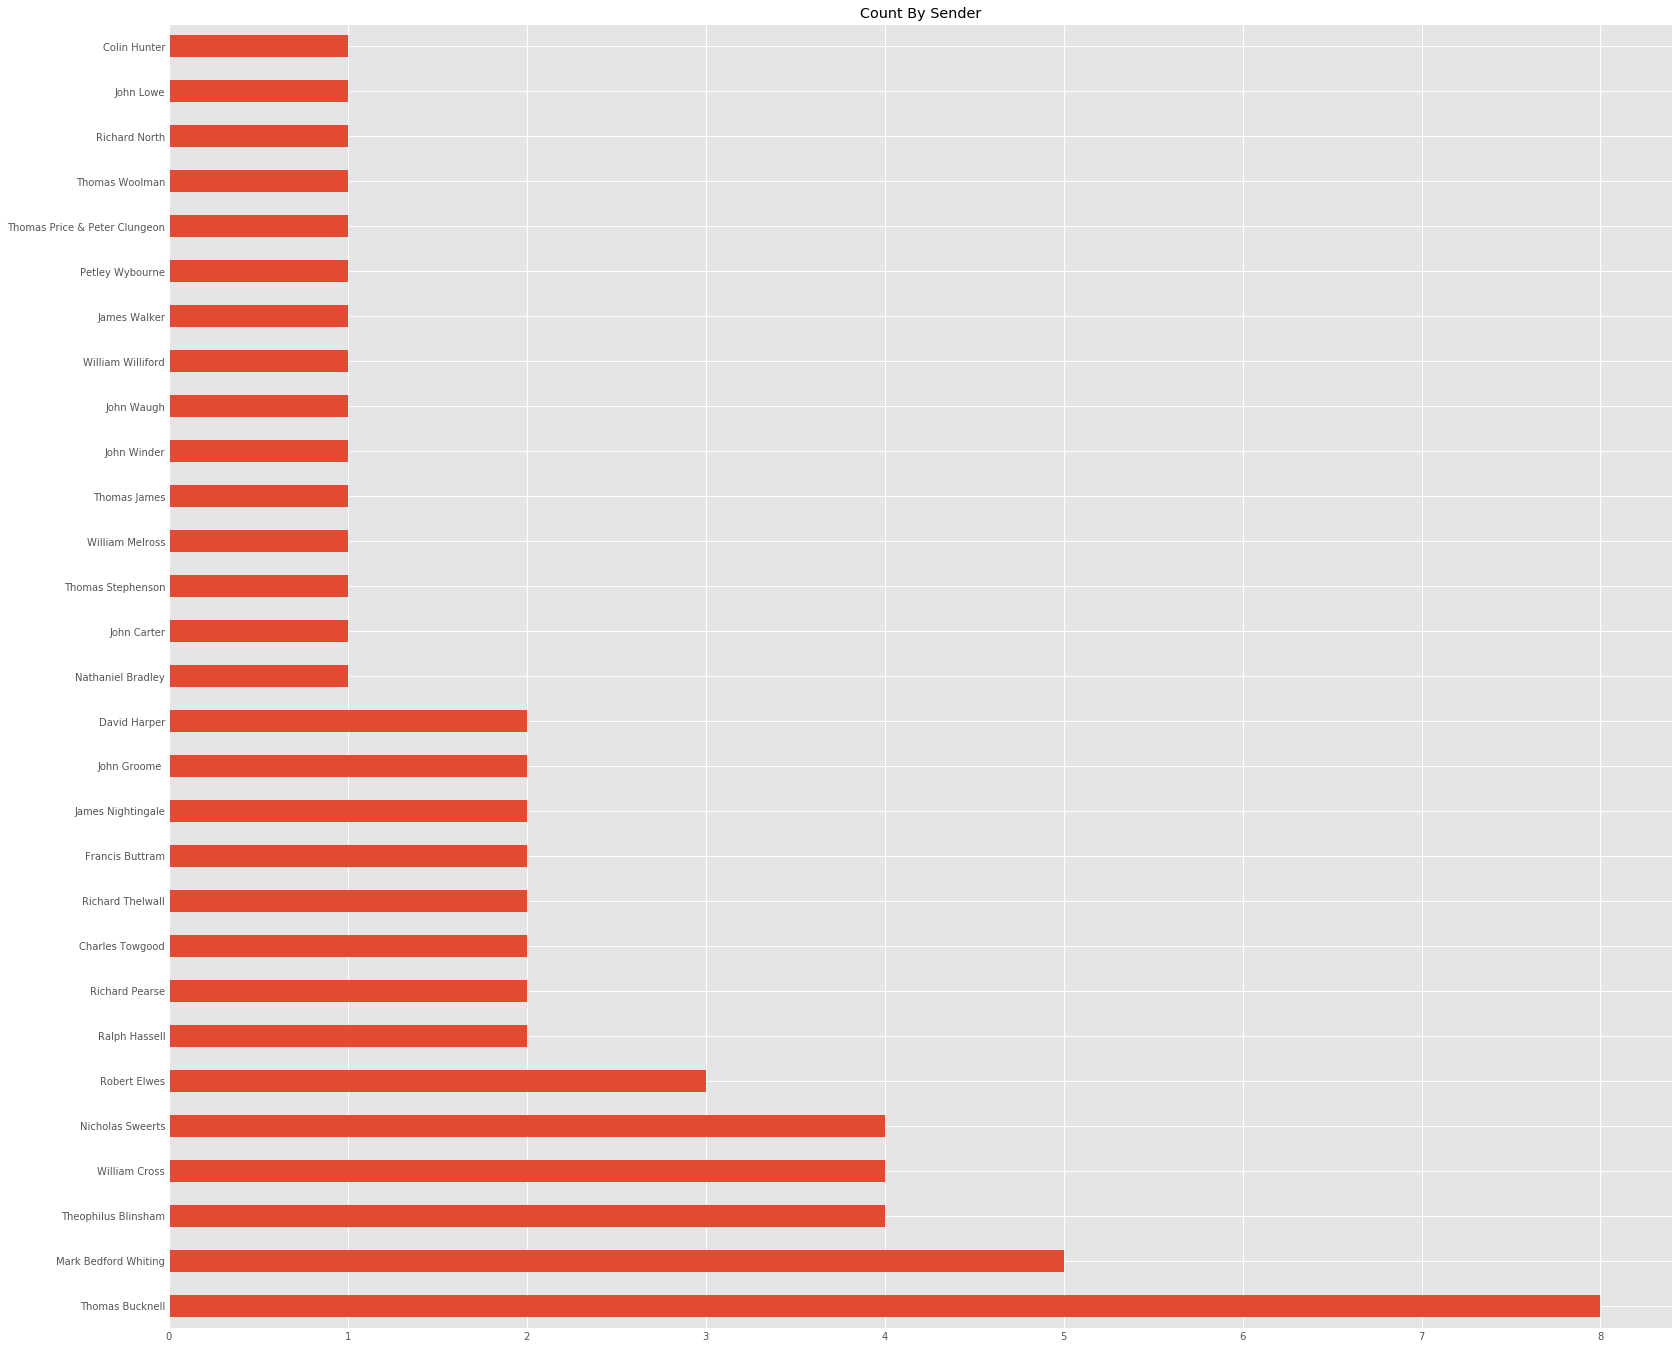

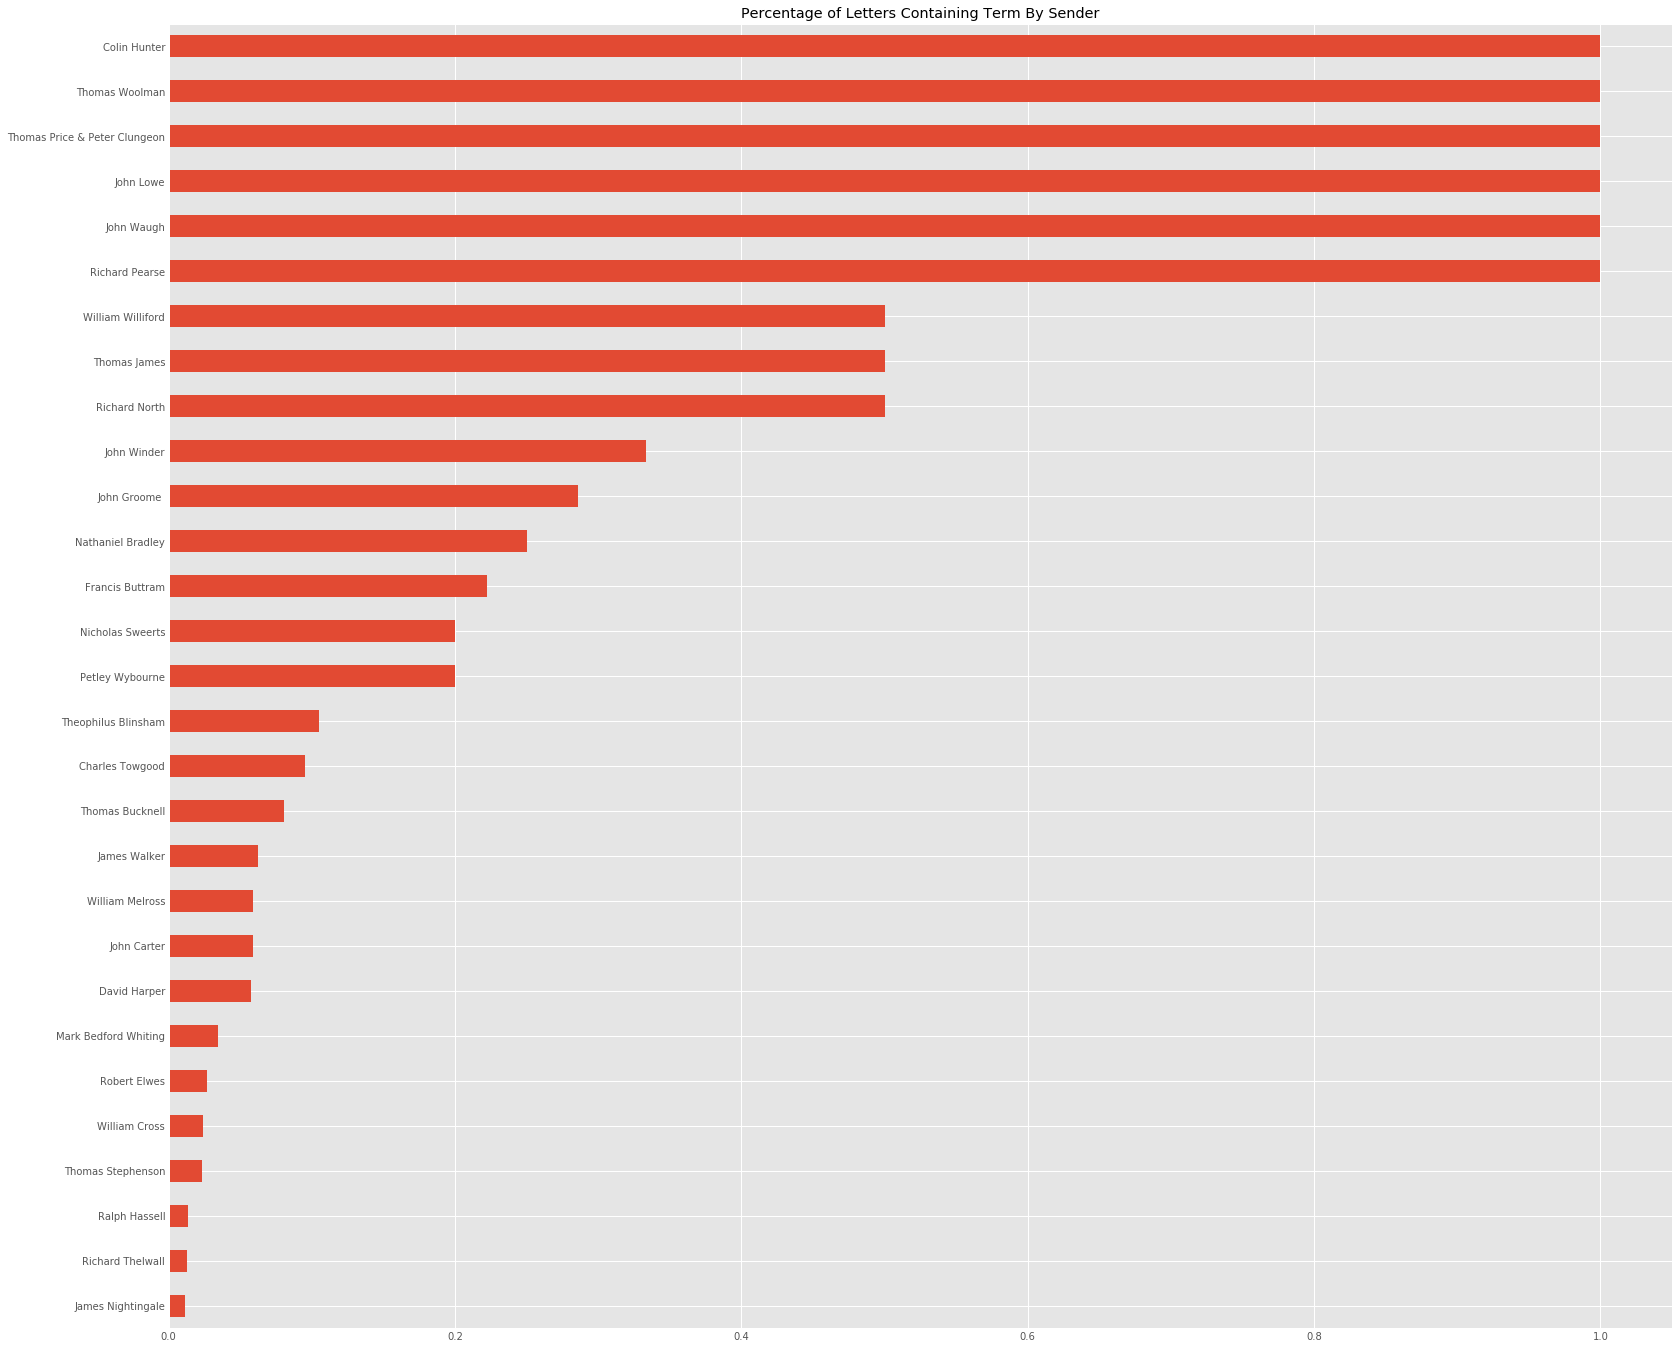

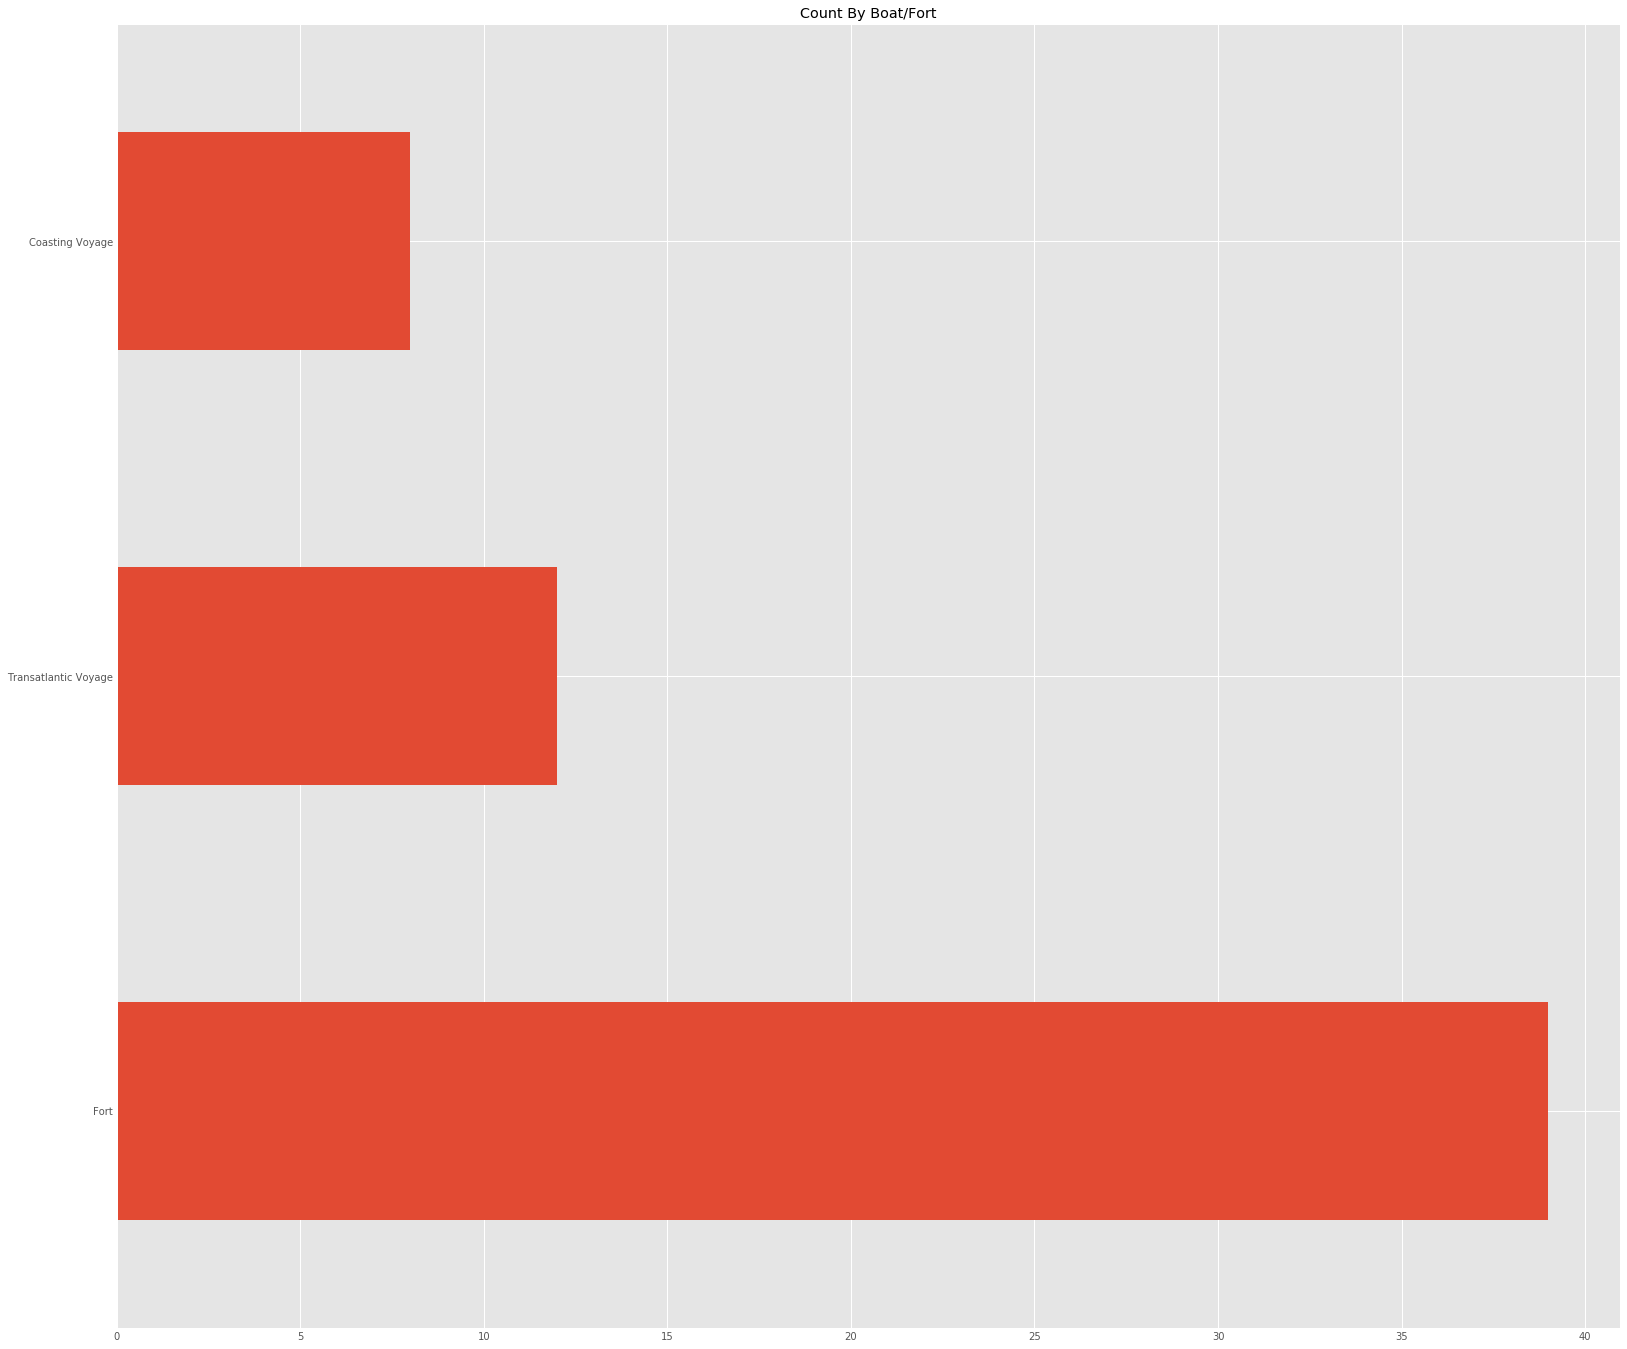

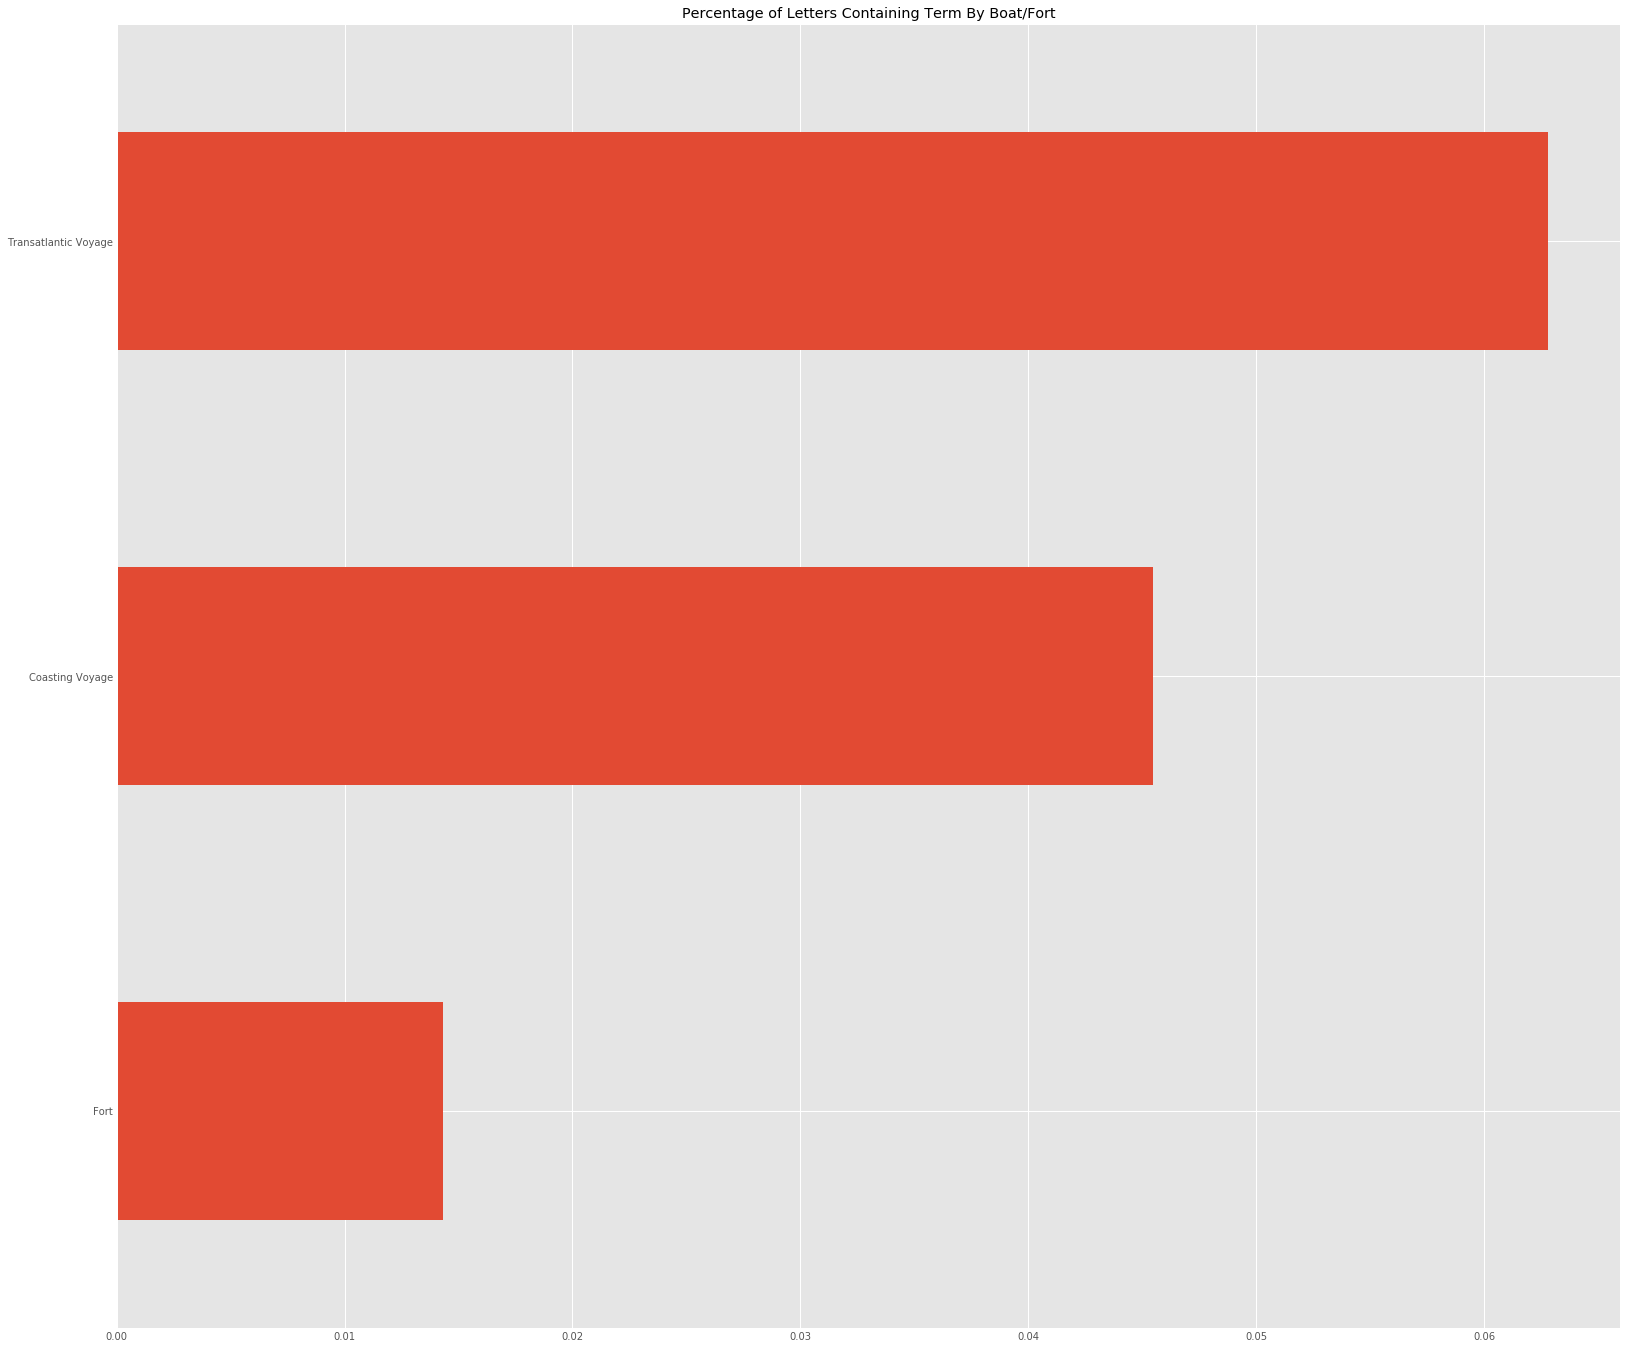

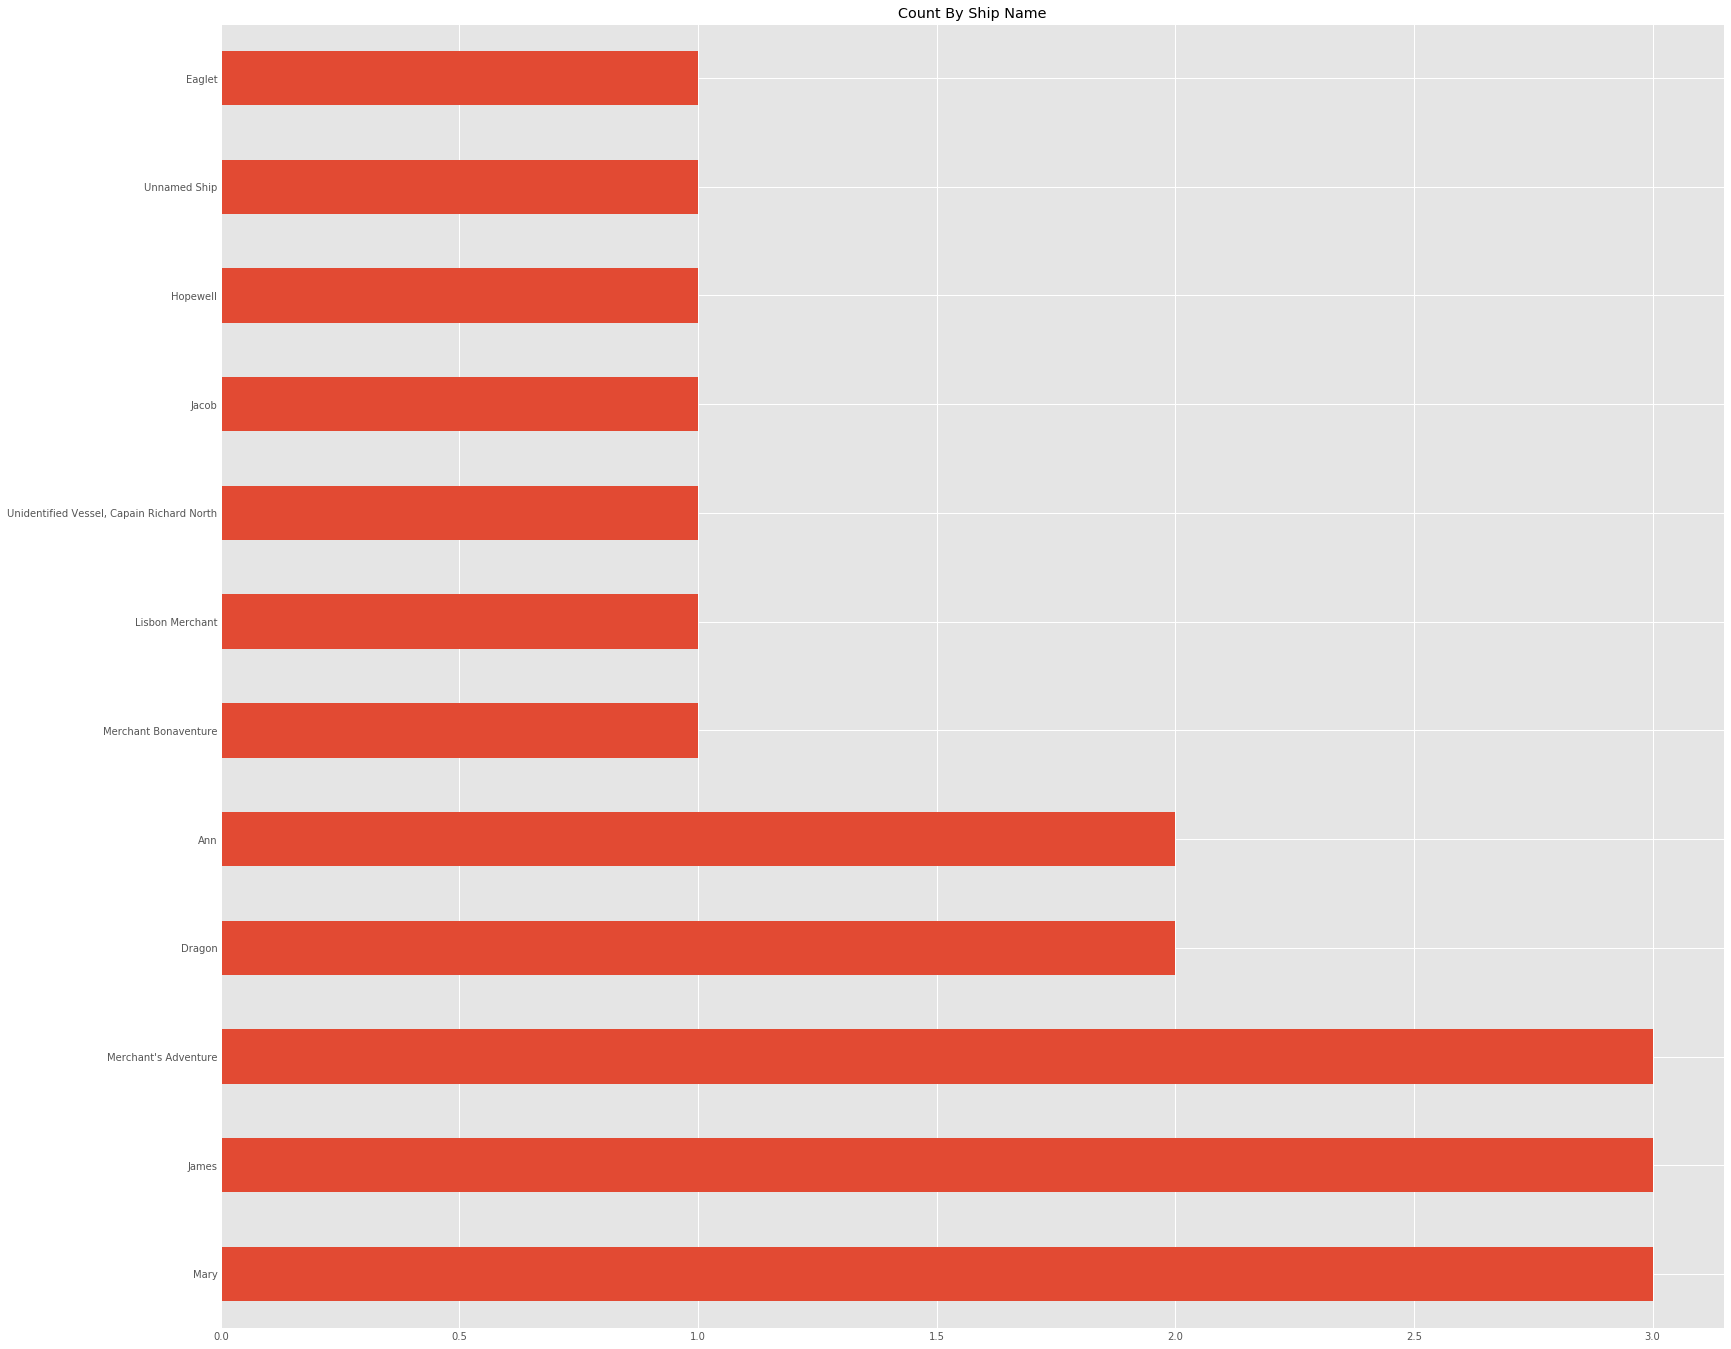

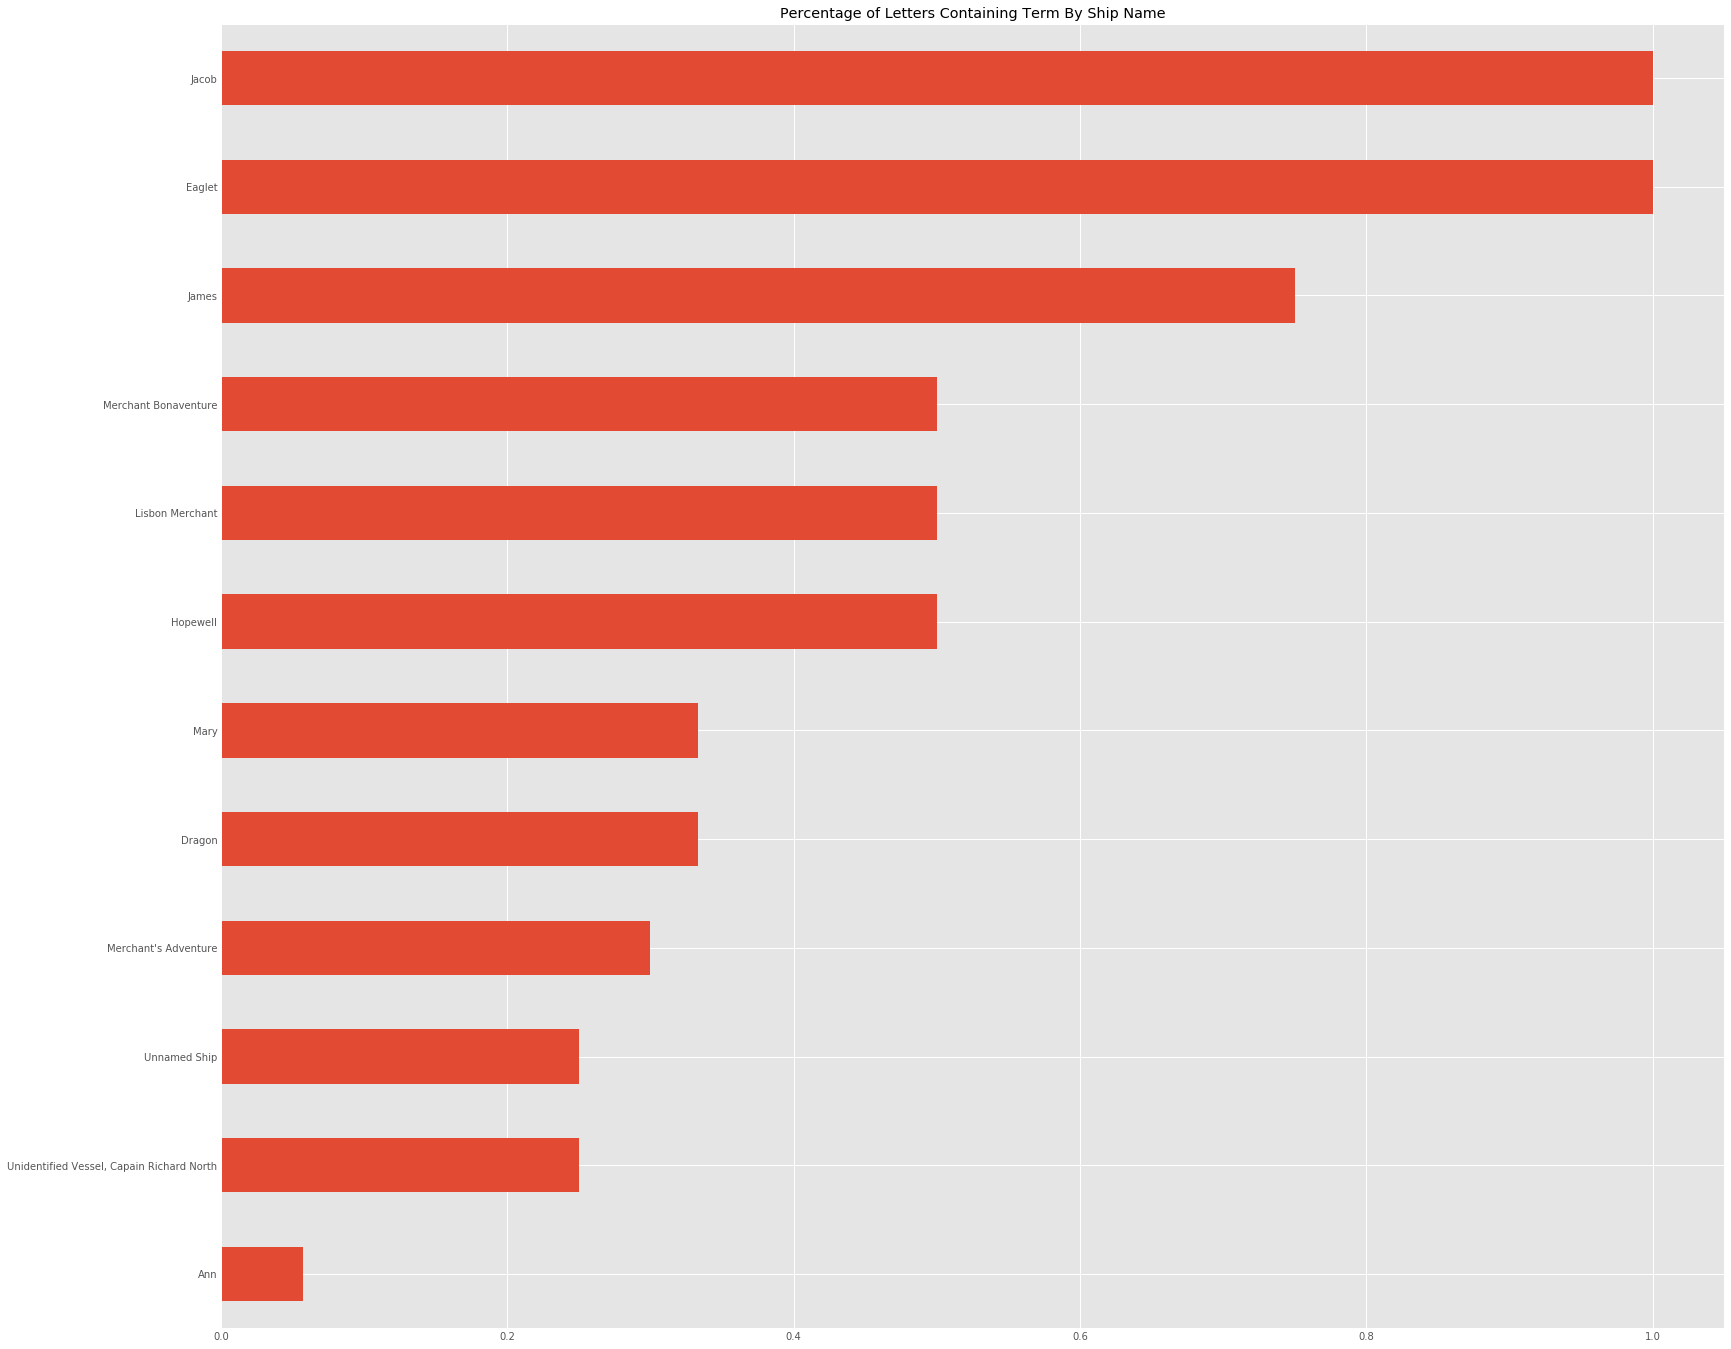

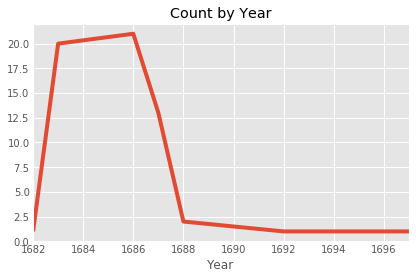

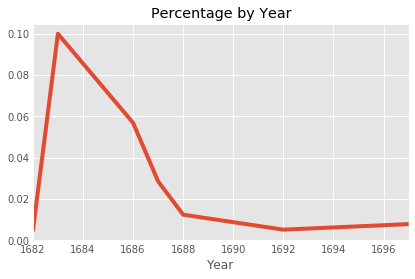

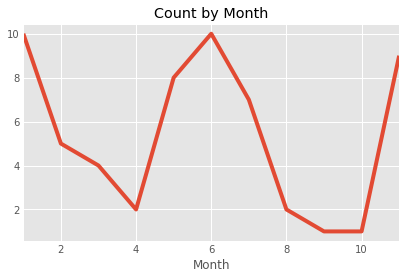

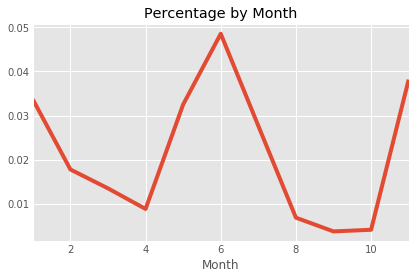

In [68]:
# Modify the terms within the brackets below to modify search. Terms need to be wrapped in parentheses and comma separated.
# The square brackets should be left unchanged.
terms = ['pirate', 'pirates']


# DO NOT CHANGE ANYTHING BELOW!!!
def return_terms_found(text, terms):
    for term in terms:
        if term in text.split(' '):
            return True
    
    return False

df['filtered'] = df['text_cleaned_dealiased'].apply(return_terms_found, args=(terms,))

df_subset = df[df['filtered'] == True]

print('Filtering for term:', terms, '({} total letters)'.format(len(df_subset)))

print('First 5 rows of filtered dataframe:')
display(df_subset.head())

print('UIDs of letters containing the term:')
print(df_subset['UID'].values)

for column in ['Place Sent From', 'Sender', 'Boat/Fort', 'Ship Name']:
    try:
        plt.figure(figsize=(24, 24))
        df_subset[column].value_counts().plot(kind='barh', title='Count By {}'.format(column))
    except:
        print 'ERROR: All metadata for this column are null'
    try:
        plt.figure(figsize=(24, 24))
        (df_subset[column].value_counts() / df[column].value_counts()).sort_values().dropna().plot(kind='barh', title='Percentage of Letters Containing Term By {}'.format(column))
        plt.figure(figsize=(24, 24))
    except:
        print 'ERROR: All metadata for this column are null'

plt.figure()
plt.title('Count by Year')
df_subset.groupby('Year').count()['UID'].plot()

plt.figure()
plt.title('Percentage by Year')
(df_subset.groupby('Year').count()['UID'] / df.groupby('Year').count()['UID']).dropna().plot()

plt.figure()
plt.title('Count by Month')
df_subset.groupby('Month').count()['UID'].plot()

plt.figure()
plt.title('Percentage by Month')
(df_subset.groupby('Month').count()['UID'] / df.groupby('Month').count()['UID']).dropna().plot()